In [23]:
from common import utils, data, models, argbind, viz
import nussl
import torch
import os
from contextlib import contextmanager
import matplotlib.pyplot as plt
import numpy as np
argbind.ARGS['args.debug'] = True
utils.logger(level='info')

LABELS = ['bass', 'drums', 'other', 'vocals']

@contextmanager
def scope(args_path, override_args={}):
    with utils.chdir('../../..'):
        args = argbind.load_args(args_path)
        for key, val in override_args.items():
            args[key] = val
        with argbind.scope(args):
            yield args

logger <- level=info


09/30/2020 08:07:57 PM | utils.py:25 Switched working directory to ../../..


device <- use=cpu
deep_mask_estimation <- model_path=checkpoints/latest.model.pth, mask_type=soft
signal <- window_length=512, hop_length=128, window_type=sqrt_hann, sample_rate=16000
val/transform <- excerpt_length=5.0, mask_type=msa, audio_only=False
val/mixer <- num_mixtures=1000, fg_path=data/valid, duration=5.0, sample_rate=16000, ref_db=[-30, -10], n_channels=1, master_label=vocals, source_file=['choose', []], snr=['uniform', -10, 10], pitch_shift=['uniform', -2, 2], time_stretch=['const', 1.0], coherent_prob=1.0, augment_prob=0.0, quick_pitch_time_prob=1.0, overfit_seed=0


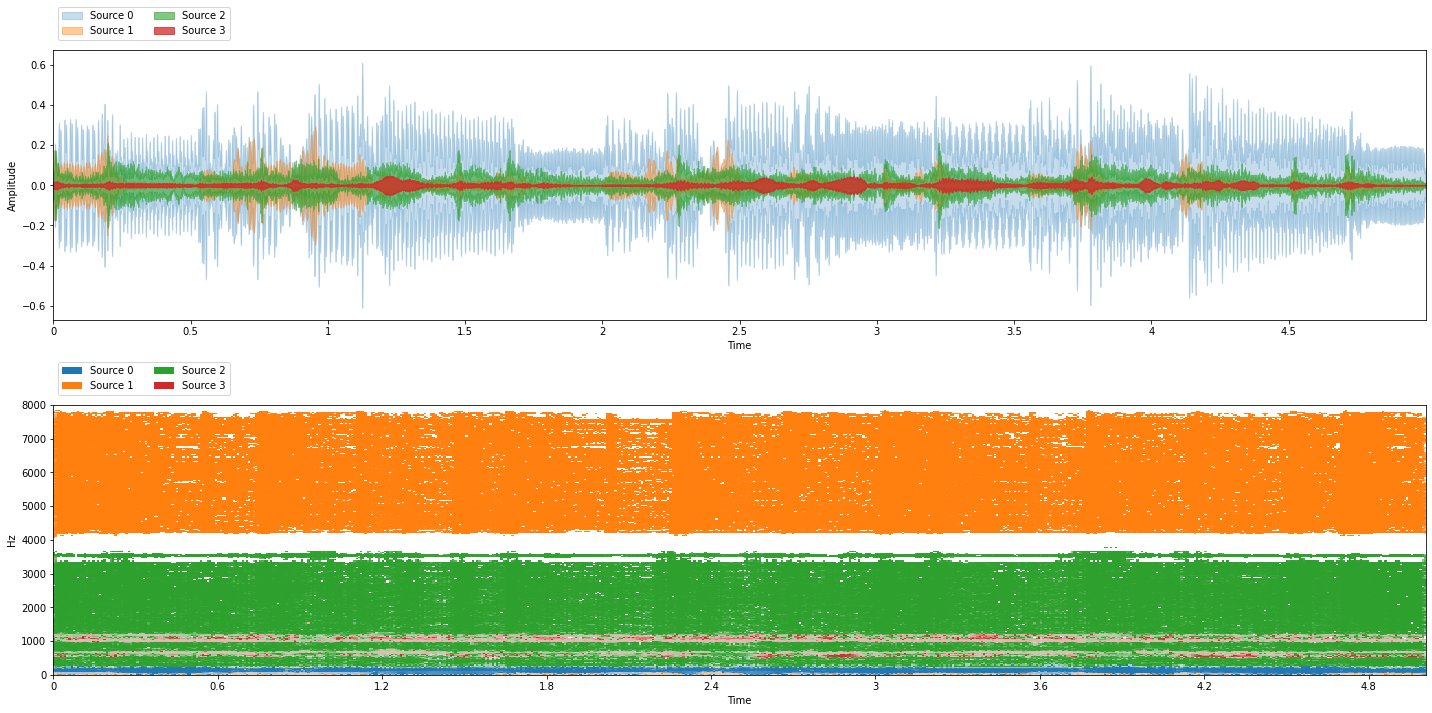


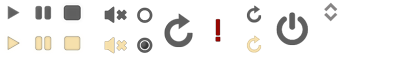
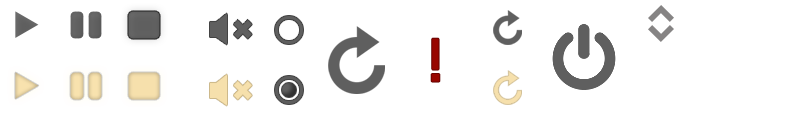
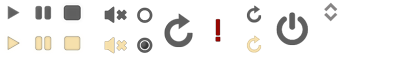

09/30/2020 08:08:58 PM | utils.py:29 Returning to /home/prem/research/tutorial/common/exp/notebooks


In [28]:
overrides = {
    'args.debug': True,
    'device.use': 'cpu',
    'deep_mask_estimation.model_path': 'checkpoints/latest.model.pth',
    'train/mixer.duration': 7.0
}

with scope('common/exp/conf/chimera.yml', overrides) as args:    
    device = utils.device()
    separator = models.deep_mask_estimation(device)
    stft_params, sample_rate = data.signal()
    
    with argbind.scope(args, 'val'):
        train_tfm = data.transform(stft_params, sample_rate)
        train_data = data.mixer(stft_params, None)
        
    item = train_data[np.random.randint(len(train_data))]
    separator.audio_signal = item['mix']
    estimates = separator()
    
    viz.embed(estimates)
    
    

In [22]:
item['metadata']['jam'].annotations[0]

<Annotation(namespace='scaper',
            time=0,
            duration=5.0,
            annotation_metadata=<AnnotationMetadata(...)>,
            data=<4 observations>,
            sandbox=<Sandbox(...)>)>